In [1]:
# %load preload.py

from matplotlib import rc

import matplotlib.pyplot as plt
from numpy import *
from control import *
from scipy.linalg import *
from sympy.solvers.solveset import linsolve
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
# from sympy import Matrix, symbols, sin, cos, tan, asin, acos, atan, simplify
from scipy.integrate import solve_ivp

plt.rc('axes',axisbelow=True)
rc('text', usetex=True)
init_vprinting()


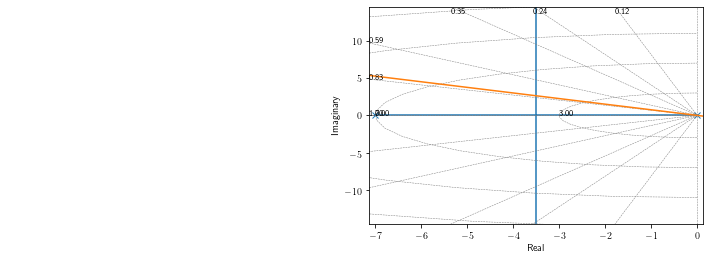

In [2]:
F = tf(6.7713,poly([0,-7]))
x = linspace(-10,10,10000)
r, k = root_locus(F)
damping_ratio = tan(pi-arccos(.7998396910782286)) * x
plt.plot(x, damping_ratio)
plt.savefig('root.png',dpi=600)

In [3]:
drline = asarray(x,dtype=complex)
drline.imag = damping_ratio

In [ ]:
xs = asarray([i for i in x1 if i!=0])
ys = asarray([i for i in x2 if i!=0])

In [ ]:
for y in ys:
    if min(abs(xs-y)) > 0.0003: continue
    print(k[list(x2).index(y)],y)
#     print(min(abs(xs-y)))

In [ ]:
r.shape

In [ ]:
step_info(F)

In [21]:
import numpy as np
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go

# Filter requirements.
T = 5.0         # Sample Period
fs = 60.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 3       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

# t = np.linspace(0,T,n)
# # sin wave
# sig = np.sin(1.2*2*np.pi*t)
# # Lets add some noise
# noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
# data = sig + noise
data = np.loadtxt('a.txt')

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

In [15]:
help('scipy.signal.butter')

Help on function butter in scipy.signal:

scipy.signal.butter = butter(N, Wn, btype='low', analog=False, output='ba', fs=None)
    Butterworth digital and analog filter design.
    
    Design an Nth-order digital or analog Butterworth filter and return
    the filter coefficients.
    
    Parameters
    ----------
    N : int
        The order of the filter.
    Wn : array_like
        The critical frequency or frequencies. For lowpass and highpass
        filters, Wn is a scalar; for bandpass and bandstop filters,
        Wn is a length-2 sequence.
    
        For a Butterworth filter, this is the point at which the gain
        drops to 1/sqrt(2) that of the passband (the "-3 dB point").
    
        For digital filters, `Wn` are in the same units as `fs`.  By default,
        `fs` is 2 half-cycles/sample, so these are normalized from 0 to 1,
        where 1 is the Nyquist frequency.  (`Wn` is thus in
        half-cycles / sample.)
    
        For analog filters, `Wn` is an angul